# AIN212 PROJECT 

NAME : MUHAMMET BATUHAN DOĞAN ID : 2210765004 

NAME : ARDA DENİZ AYYILDIZ    ID : 2210765018


# BUSINESS UNDERSTANDING
Our problem is build a text classification model to predict the main genre(s) of a movie based on its summary,title,director,writer,motion picture rating. This could involve using natural language processing (NLP) techniques to analyze the textual content and classify movies into predefined genres.

# DATA MINING
We gathered our dataset from Kaggle https://www.kaggle.com/datasets/elvinrustam/imdb-movies-dataset. We used Pandas to load the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
path_to_dataset = 'IMDbMovies-Clean.csv'
df = pd.read_csv(path_to_dataset)


# DATA EXPLORATION
Based on our dataset we were able to show only two features distributions.Since, director, title, writer features have a lot of individuals which we can not visualize with plot.

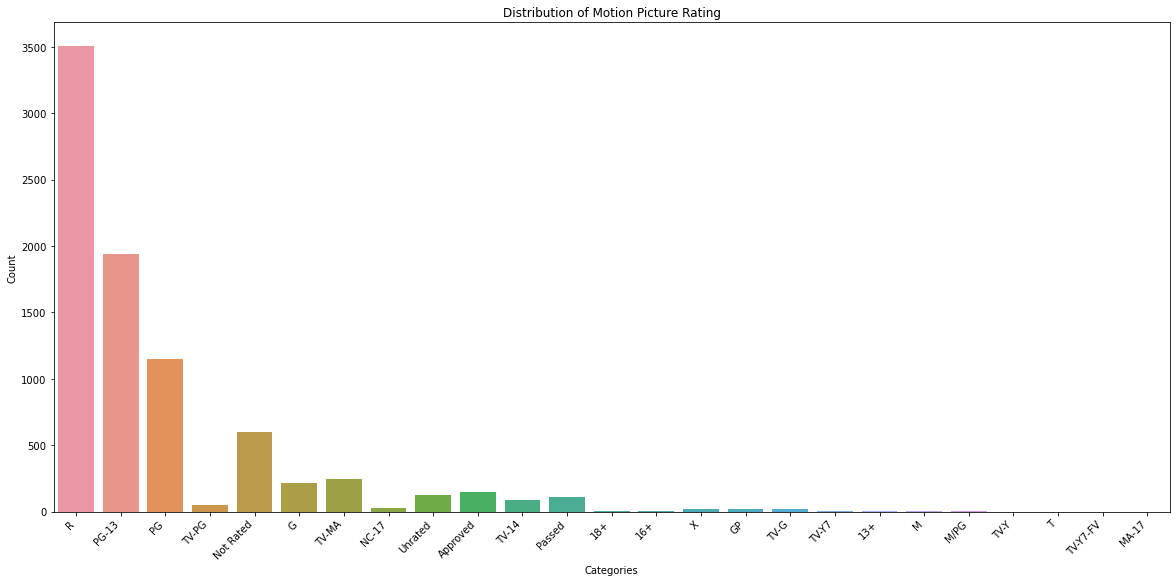

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 9))
sns.countplot(x='Motion Picture Rating', data=df)
plt.title('Distribution of Motion Picture Rating')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


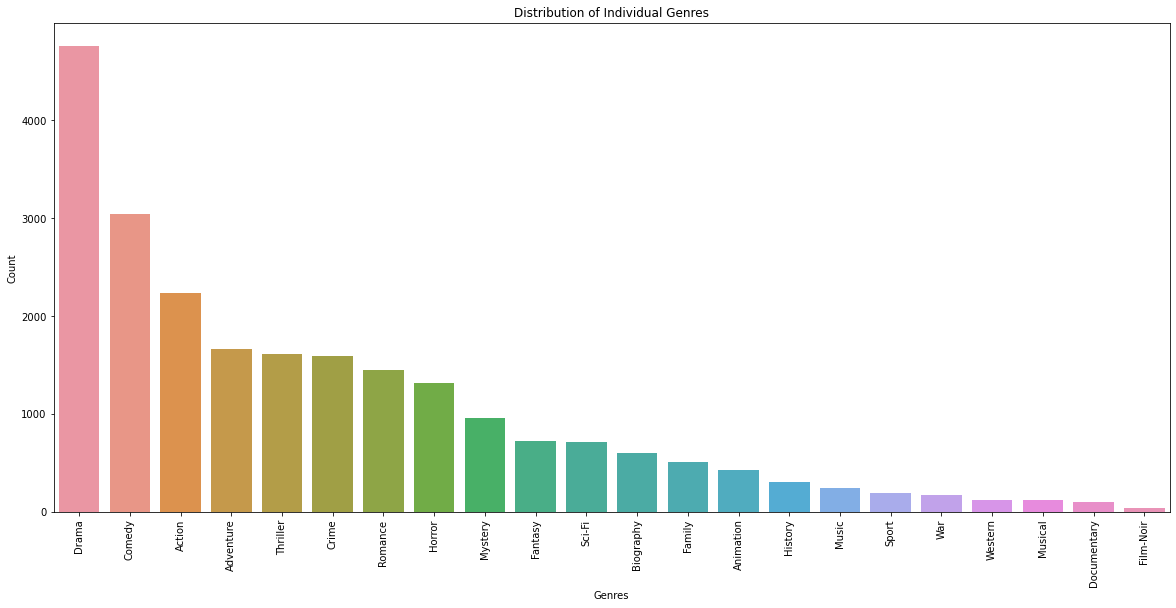

In [3]:
genres_separated = df['Main Genres'].str.split(',', expand=True).stack()


unique_genres = genres_separated.reset_index(level=1, drop=True).to_frame('Unique Genres')


plt.figure(figsize=(20, 9))
sns.countplot(x='Unique Genres', data=unique_genres, order = unique_genres['Unique Genres'].value_counts().index)
plt.title('Distribution of Individual Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

# DATA CLEANING
Firstly, we have filled missing values for textual data with 'mode imputation' but that solution made bias on our dataset.Therefore, we decided on using more accurate way to reflect all members of the population so we use 'random forest classifier' to fill missing values. We ignore numeric features since they are not correlated with our problem.

In [4]:
df.head()

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Release Year,Runtime (Minutes),Rating (Out of 10),Number of Ratings (in thousands),Budget (in millions),Gross in US & Canada (in millions),Gross worldwide (in millions),Opening Weekend in US & Canada,Gross Opening Weekend (in millions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2023.0,158.0,6.7,38.0,NaN,37.514,84.968,11.26.2023,20.639
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2023.0,157.0,7.2,37.0,100.0,105.043,191.729,11.19.2023,44.607
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,2023.0,118.0,6.8,117.0,NaN,NaN,0.421,NaN,NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,2023.0,102.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,2023.0,106.0,7.0,9.1,NaN,25.409,29.667,11.19.2023,10.306


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Title                                9083 non-null   object 
 1   Summary                              9083 non-null   object 
 2   Director                             9052 non-null   object 
 3   Writer                               8759 non-null   object 
 4   Main Genres                          9076 non-null   object 
 5   Motion Picture Rating                8285 non-null   object 
 6   Release Year                         9076 non-null   float64
 7   Runtime (Minutes)                    8918 non-null   float64
 8   Rating (Out of 10)                   8813 non-null   float64
 9   Number of Ratings (in thousands)     8813 non-null   float64
 10  Budget (in millions)                 5879 non-null   float64
 11  Gross in US & Canada (in milli

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#Encode categorical feature
le = LabelEncoder()
df['Main Genres'] = le.fit_transform(df['Main Genres'])

#Split data into training and test sets
train_data = df.dropna(subset=['Writer', 'Director','Motion Picture Rating','Main Genres'])
test_data = df[df['Writer'].isnull() | df['Director'].isnull()|df['Motion Picture Rating'].isnull()|df['Main Genres'].isnull()]

#Train a Random Forest classifier
clf = RandomForestClassifier()
X_train = train_data[['Main Genres']]  
y_writer = train_data['Writer']
y_director = train_data['Director']
y_motion_picture_rating = train_data['Motion Picture Rating']
y_main_genres = train_data['Main Genres']


clf.fit(X_train, y_writer)
writer_predictions = clf.predict(test_data[['Main Genres']])
df.loc[test_data.index, 'Writer'] = writer_predictions

clf.fit(X_train, y_director)
director_predictions = clf.predict(test_data[['Main Genres']])
df.loc[test_data.index, 'Director'] = director_predictions

clf.fit(X_train, y_motion_picture_rating)
director_predictions = clf.predict(test_data[['Main Genres']])
df.loc[test_data.index, 'Motion Picture Rating'] = director_predictions

clf.fit(X_train, y_main_genres)
director_predictions = clf.predict(test_data[['Main Genres']])
df.loc[test_data.index, 'Main Genres'] = director_predictions

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Title                                9083 non-null   object 
 1   Summary                              9083 non-null   object 
 2   Director                             9083 non-null   object 
 3   Writer                               9083 non-null   object 
 4   Main Genres                          9083 non-null   int32  
 5   Motion Picture Rating                9083 non-null   object 
 6   Release Year                         9076 non-null   float64
 7   Runtime (Minutes)                    8918 non-null   float64
 8   Rating (Out of 10)                   8813 non-null   float64
 9   Number of Ratings (in thousands)     8813 non-null   float64
 10  Budget (in millions)                 5879 non-null   float64
 11  Gross in US & Canada (in milli

We encoded 'Main Genres' column for faster calculations. Also we filled missing values for categorical features.

# PREDICTIVE MODELLING 
According to our problem, we use five different classification model.(Multinomial Naive Bayes classifier, GridSearchCV, cross-validation, LinearSVC, RandomForestClassifier). Multinomial Naive Bayes gives us 0.10 accuracy, GridSearchCV gives us 0.20 accuracy, cross-validation gives us 0.22 accuracy, LinearSVC gives us 0.30 accuracy, RandomForestClassifier gives us 0.25 accuracy. LinearSVC and Random forest classifier gives highest two acccuracy scores.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Concatenate relevant columns into a single text feature
df['combined_text'] = df['Title'] + ' ' + df['Summary'] + ' ' + df['Director'] + ' ' + df['Writer'] + ' ' + ' ' + df['Motion Picture Rating']

# Separate predictor variables and response variable
X = df['combined_text']
y = df['Main Genres']

# Text preprocessing and feature extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.10
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       1.00      0.00      0.00         2
           2       1.00      0.00      0.00         4
           3       0.60      0.07      0.13        40
           4       1.00      0.00      0.00         8
           5       1.00      0.04      0.07        28
           6       1.00      0.00      0.00         6
           7       1.00      0.05      0.10        19
           9       1.00      0.00      0.00         4
          10       1.00      0.00      0.00         4
          11       1.00      0.00      0.00         2
          12       0.54      0.27      0.36        26
          13       1.00      0.00      0.00        17
          14       1.00      0.00      0.00         1
          15       1.00      0.00      0.00         1
          17       1.00      0.00      0.00         3
          18       1.00      0.00      0.00         6
          20

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}


grid_search = GridSearchCV(clf, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best classifier
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, zero_division=1))


C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'alpha': 0.1}
Best Accuracy: 0.20
Test Accuracy: 0.20
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       1.00      0.00      0.00         2
           2       1.00      0.00      0.00         4
           3       0.31      0.45      0.37        40
           4       1.00      0.00      0.00         8
           5       0.56      0.18      0.27        28
           6       1.00      0.00      0.00         6
           7       0.50      0.47      0.49        19
           9       1.00      0.00      0.00         4
          10       1.00      0.00      0.00         4
          11       1.00      0.00      0.00         2
          12       0.26      0.54      0.35        26
          13       0.90      0.53      0.67        17
          14       1.00      0.00      0.00         1
          15       1.00      0.00      0.00         1
          17       1.00      0.00      0.00         3
         

In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

X = df['combined_text']
y = df['Main Genres']

# Text preprocessing and feature extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

clf = MultinomialNB()

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

# Get the best estimator and its corresponding parameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.2f}")

# Use cross_val_score to get accuracy on each fold
cross_val_acc = cross_val_score(best_clf, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validated Accuracy on Each Fold: {cross_val_acc}")


C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'alpha': 0.1}
Best Cross-Validated Accuracy: 0.22


C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Accuracy on Each Fold: [0.22289488 0.20253165 0.22729774 0.21696035 0.21255507]


In [14]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['combined_text']
y = df['Main Genres']

# Text preprocessing and feature extraction
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Initialize LinearSVC classifier
clf_svc = LinearSVC()

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_clf_svc = clf_svc

# Perform cross-validation with LinearSVC
cross_val_acc_svc = cross_val_score(best_clf_svc, X_tfidf, y, cv=cv, scoring='accuracy')

print(f"Cross-Validated Accuracy on Each Fold with LinearSVC: {cross_val_acc_svc}")
print(f"Mean Cross-Validated Accuracy with LinearSVC: {cross_val_acc_svc.mean():.2f}")


C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Accuracy on Each Fold with LinearSVC: [0.29609246 0.29719318 0.31150248 0.30011013 0.31552863]
Mean Cross-Validated Accuracy with LinearSVC: 0.30


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['combined_text']
y = df['Main Genres']

# Text preprocessing and feature extraction
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Initialize RandomForestClassifier
clf_rf = RandomForestClassifier()

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_clf_rf = clf_rf

# Perform cross-validation with RandomForestClassifier
cross_val_acc_rf = cross_val_score(best_clf_rf, X_tfidf, y, cv=cv, scoring='accuracy')

print(f"Cross-Validated Accuracy on Each Fold with RandomForestClassifier: {cross_val_acc_rf}")
print(f"Mean Cross-Validated Accuracy with RandomForestClassifier: {cross_val_acc_rf.mean():.2f}")


C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Accuracy on Each Fold with RandomForestClassifier: [0.24656026 0.24711062 0.25151348 0.26156388 0.25055066]
Mean Cross-Validated Accuracy with RandomForestClassifier: 0.25


# MODEL EVALUATION AND VISUALIZATIONS
We tried to give classification report and the confusion matrix. Since, our textual data has a lot of unique variables confusion matrix seems very complicated.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         4
           3       0.35      0.45      0.40        40
           4       0.60      0.38      0.46         8
           5       0.25      0.25      0.25        28
           6       0.17      0.17      0.17         6
           7       0.44      0.63      0.52        19
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         4
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         2
          12       0.29      0.58      0.38        26
          13       0.76      0.76      0.76        17
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
    

C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbdn1\anaconda3\lib\site-packages\sklearn\metrics\_cla

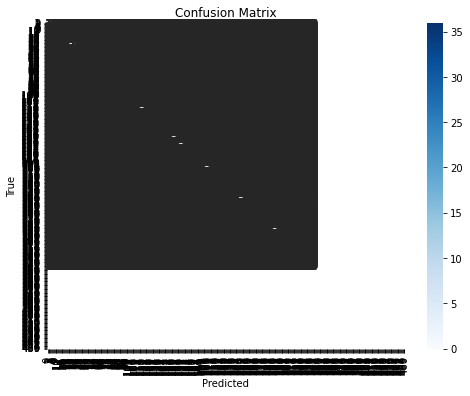

In [21]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_clf_svc.classes_, yticklabels=best_clf_svc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
